In [1]:
import numpy as np
import numpy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
import matplotlib.pyplot as plt
import sys


In [2]:
sys.path.append('../..')
import problems, projection, optimize

# testing problems
---

-  __1D blur__
> - pixels = 200
> - ROI(k) = 10, ... , 190 with 3 steps
> - $\lambda$ = 1e-4, ... , 1e4 with 5 steps
> - B = identity

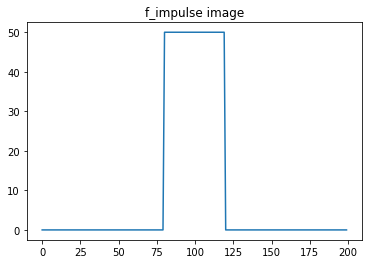

=================== setup ====================
(n_1, n_2, m) = (200, None, 200)
problem       = 1D Blur
lam           = 1000
B             = <class 'scipy.sparse.dia.dia_matrix'>
ROI pixels    = 50
ROI row       = None

================== contents ==================
K_diag        = [ 1.  1.  1.  1.  1.]...[ 1.  1.  1.  1.  1.]
sigma         = 3
t             = 10
ESI?          = True
ESIN?         = True
direct?       = True
================= dimensions ==================
Kb shape      = (200, 200)
X shape       = (200, 200)
M shape       = (50, 200)
B shape       = (200, 200)
sx shape      = (200, 1)
sb shape      = (200, 1)
============= system dimensions ===============
ESI_A shape   = (400, 400)
ESI_b shape   = (400,)
ESIN_A shape  = (400, 400)
ESIN_b shape  = (400,)


/Users/jakeroth/anaconda/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [3]:
# single test
## problem
n_1 = 200
k = 50
lam = 1000
sigma = 3
t = 10
p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, ESI=True, dir_soln=True)
p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
p.summarize()

===== method = all ======================================================================
          lam: 1.00E+03
            k: 50
    max iters: 50
    tolerance: 1e-05
    raar step: 2
      dr step: 2
     beta: 0.95
===== method = all ======================================================================



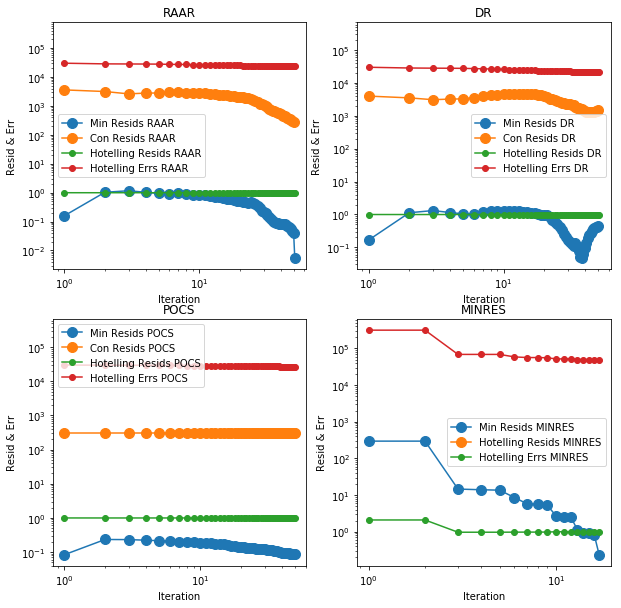

In [4]:
## examples: solve problem - - - - - - - - - - - - - - - - -
# projection.test_proj_alg(prob=p, method='pocs')
# projection.test_proj_alg(prob=p, method='dr', sl=1.25)
# projection.test_proj_alg(prob=p, method='raar')
# projection.test_proj_alg(prob=p, method='minres')
m_r, c_r, h_r, h_e = projection.test_proj_alg(prob=p, method='all',max_iter=50, beta=0.95)

In [5]:
# set blur parameters
sigma  = 3
t      = 10
sparse = True

# set dimensions
n_1    = 200
kk     = np.linspace(10, 190, 3)

# set regularization by first generating blur on test problem
tp = problems.Problem(prob='b', n_1=n_1, k=k, ESI=True, dir_soln=True)
tp._set_inputs(K_diag=np.ones(p.n), sigma=3, t=10, sparse=True)
tp._set_operators()
XtX = tp.X.toarray().T.dot(tp.X.toarray())
kappa = la.cond(XtX)

lamlam = [0.1, 1, 10]
lamlam = [0.01] + [kappa*lam for lam in lamlam]

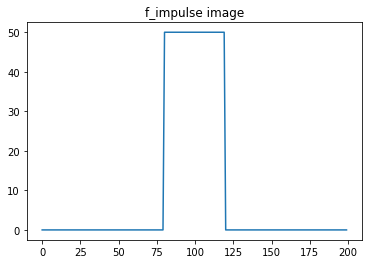

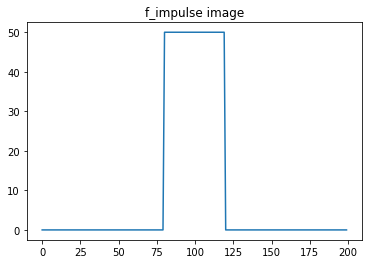

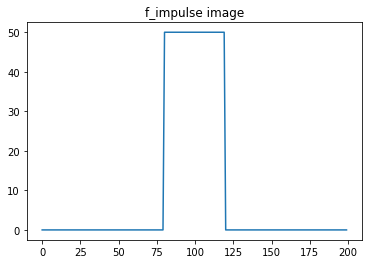

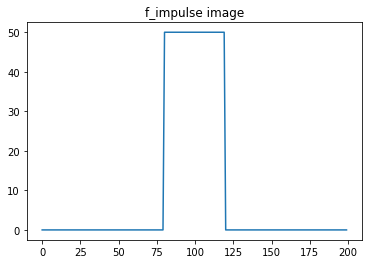

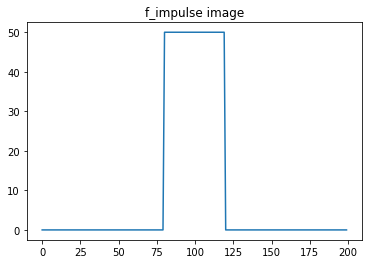

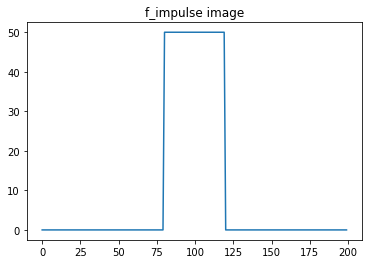

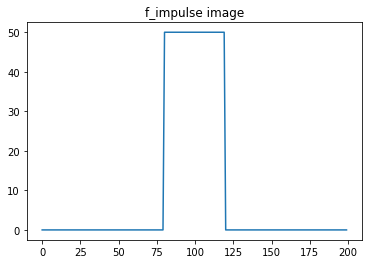

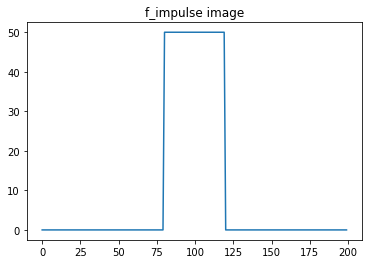

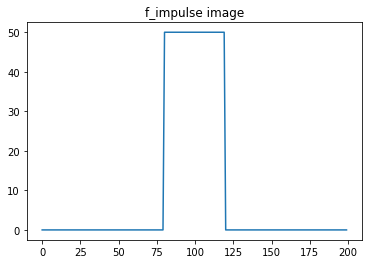

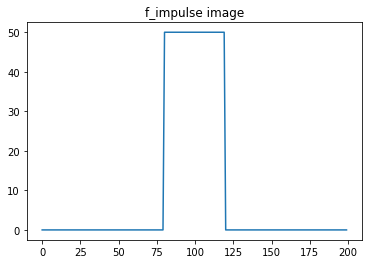

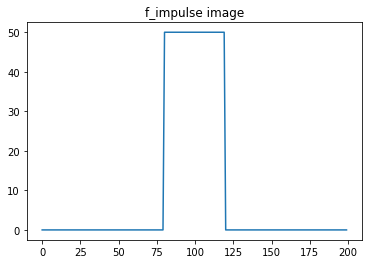

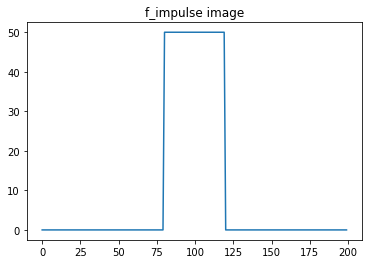

In [6]:
# create problems
ps = []
for k in kk:
    for lam in lamlam:
        p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, ESI=True, dir_soln=True)
        p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
        ps.append(p)

In [7]:
# # solve problems
# for p in ps:
#     projection.test_proj_alg(prob=p, method='pocs')
#     projection.test_proj_alg(prob=p, method='dr', sl_dr=1.5)
#     projection.test_proj_alg(prob=p, method='raar', beta=0.5)
#     projection.test_proj_alg(prob=p, method='minres')


===== method = all ======================================================================
          lam: 1.00E-02
            k: 10.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



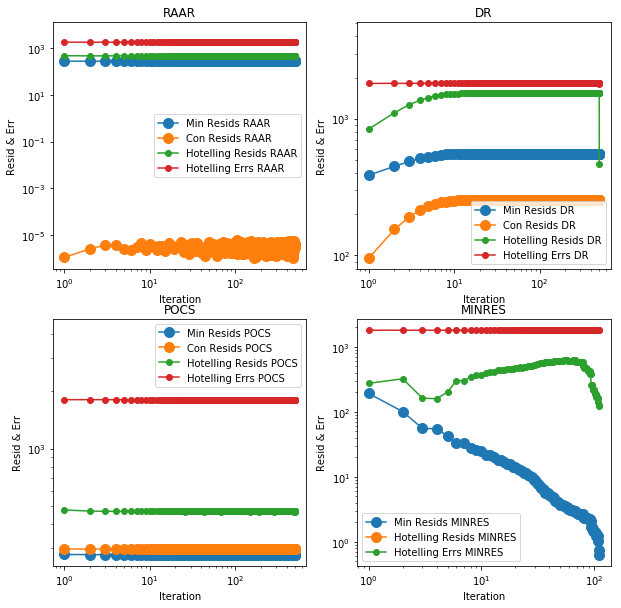

===== method = all ======================================================================
          lam: 1.95E+09
            k: 10.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



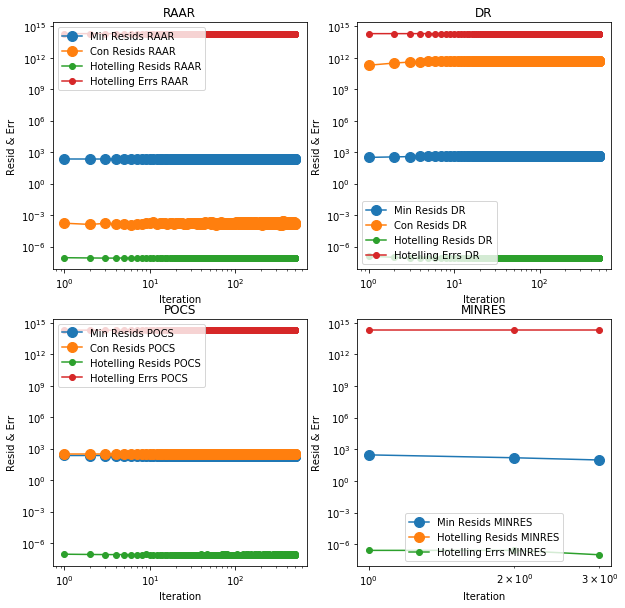

===== method = all ======================================================================
          lam: 1.95E+10
            k: 10.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



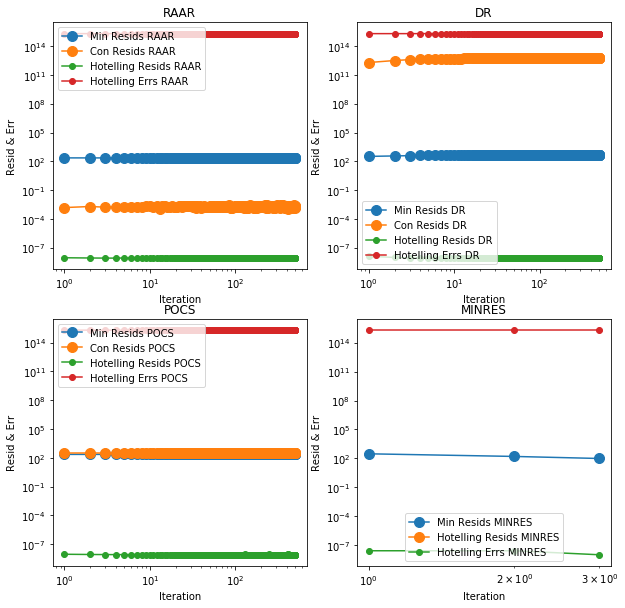

===== method = all ======================================================================
          lam: 1.95E+11
            k: 10.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



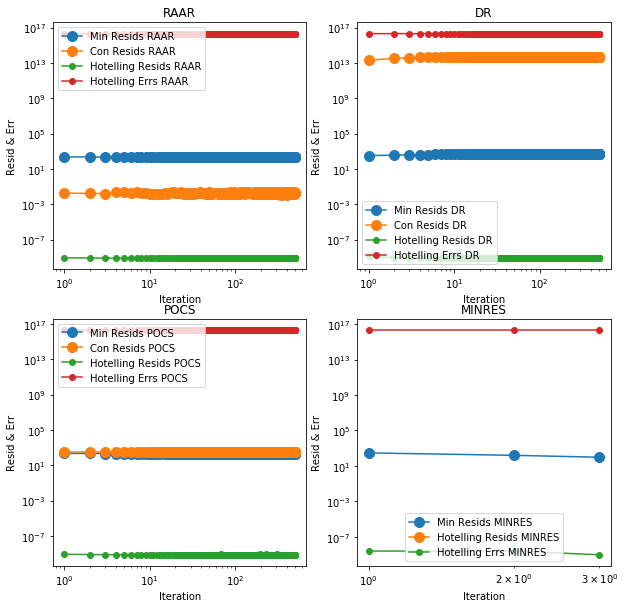

===== method = all ======================================================================
          lam: 1.00E-02
            k: 100.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



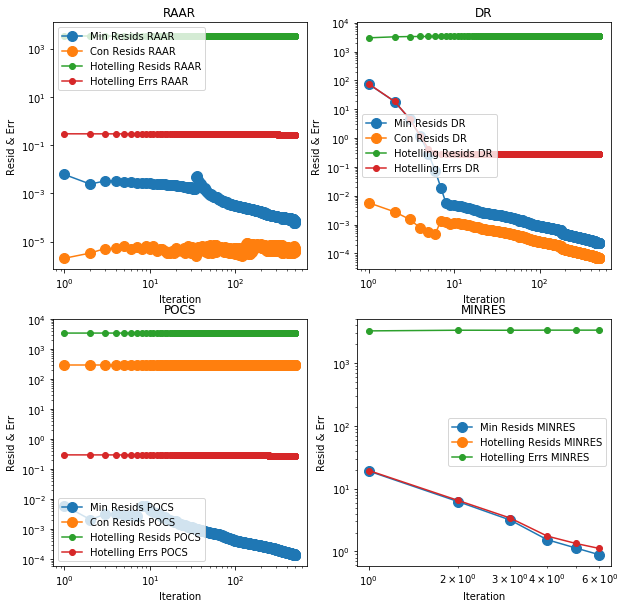

===== method = all ======================================================================
          lam: 1.95E+09
            k: 100.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



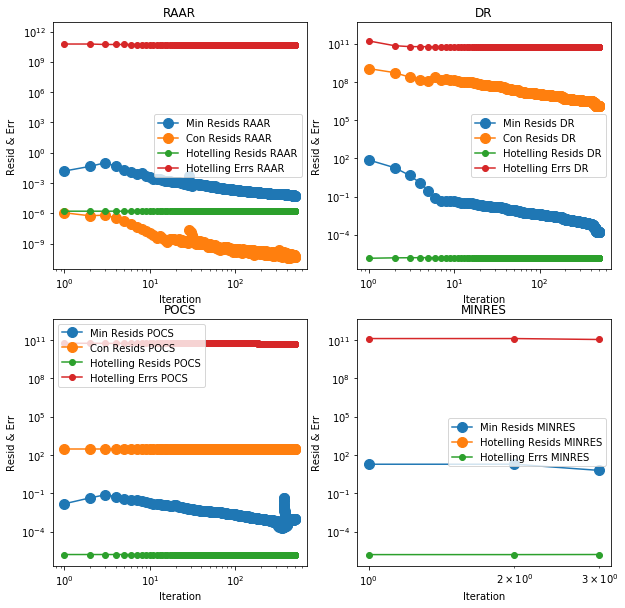

===== method = all ======================================================================
          lam: 1.95E+10
            k: 100.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



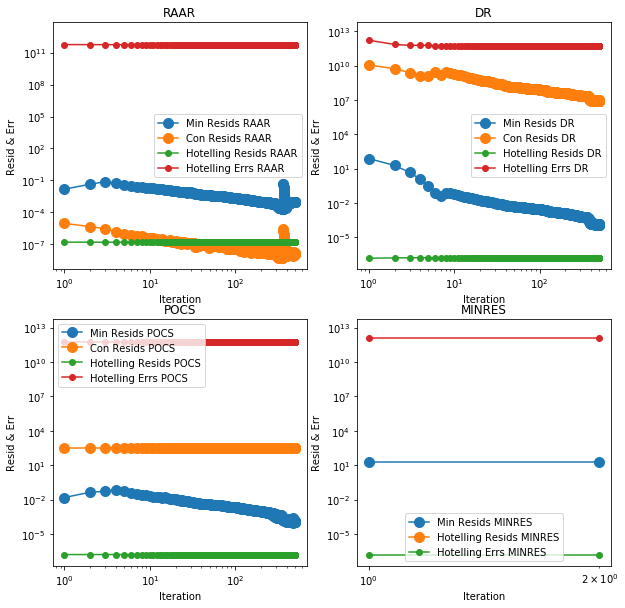

===== method = all ======================================================================
          lam: 1.95E+11
            k: 100.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



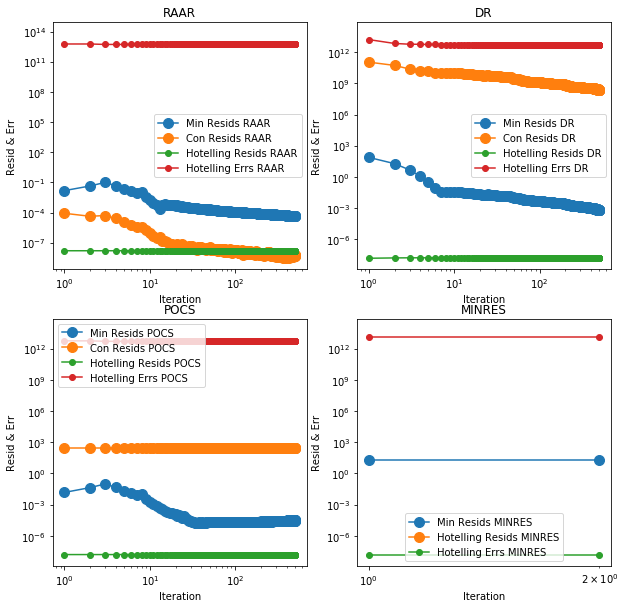

min_resid break
===== method = all ======================================================================
          lam: 1.00E-02
            k: 190.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



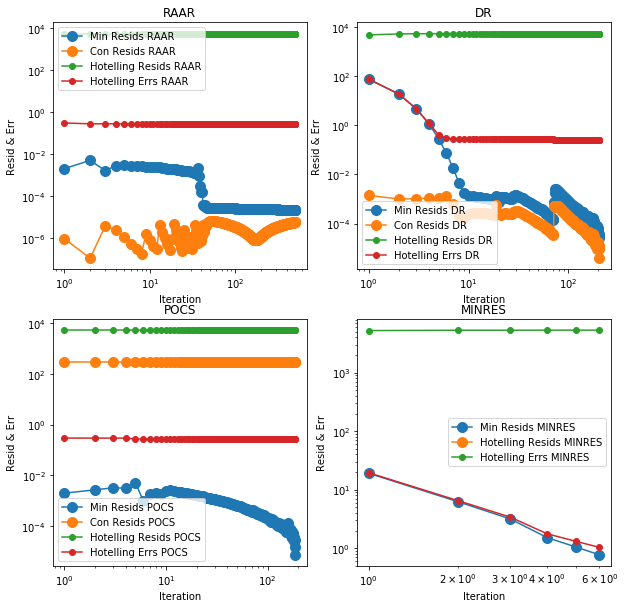

===== method = all ======================================================================
          lam: 1.95E+09
            k: 190.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



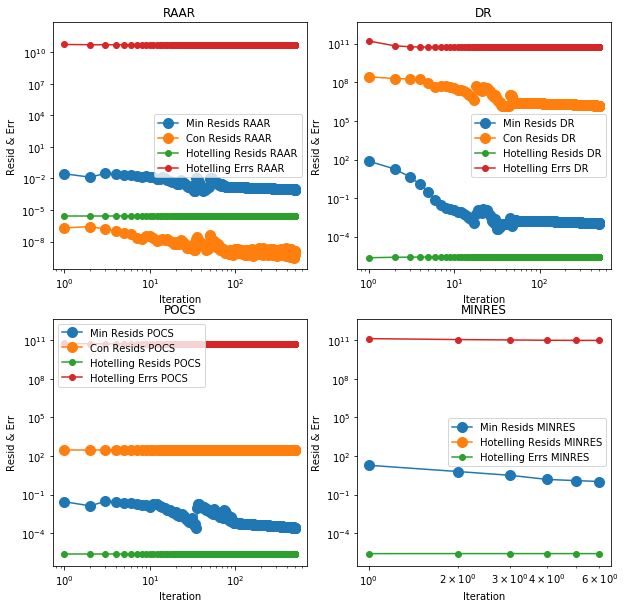

===== method = all ======================================================================
          lam: 1.95E+10
            k: 190.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



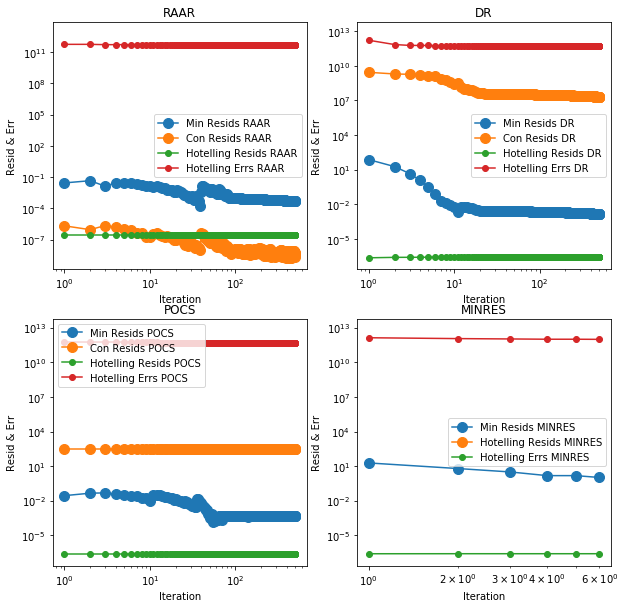

===== method = all ======================================================================
          lam: 1.95E+11
            k: 190.0
    max iters: 500
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



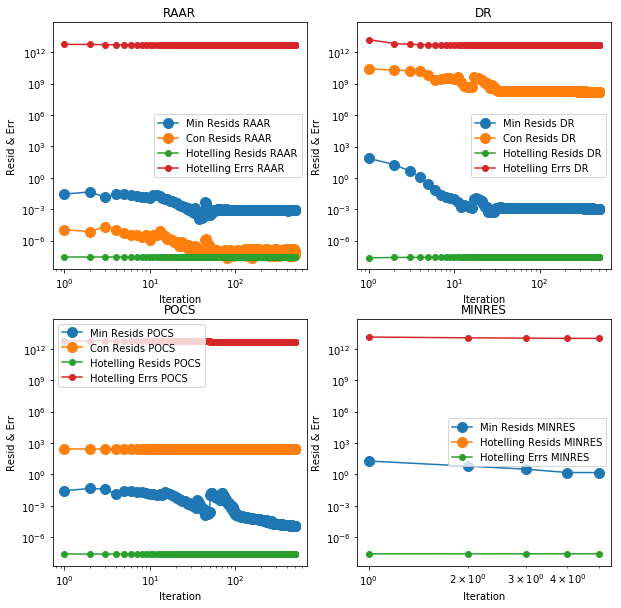

In [8]:
# solve problems
for p in ps:
    projection.test_proj_alg(prob=p, method='all', sl_dr=1.5, beta=0.5)